<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/L11_Likelihood_Ratio_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asymptotic distribution of Likelihood Ratio Test statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

$X_1,\dots, X_n\sim$ i.i.d Bernoulli with probability $p$.

Test $H_0:\ p=p_{0}$ vs. $H_1:\ p\neq p_{0}$.  

The likelihood function is $L(p|x_{1},\dots,x_{n}) = \prod_{i=1}^{n} p^{x_{i}}(1-p)^{1-x_{i}} =  p^{\sum_{i} x_{i}}(1-p)^{n-\sum_{i} x_{i}}$.

The Likelihood Ratio Test statistics is:
$$
\lambda(X_{1},\dots,X_{n}) =
\frac{p_{0}^{\sum_{i=1}^{n} X_{i}} (1-p_{0})^{n-\sum_{i=1}^{n} X_{i}}}
{\bar{X}^{\sum_{i=1}^{n} X_{i}} (1-\bar{X})^{n-\sum_{i=1}^{n} X_{i}}}
$$
The sample mean is $\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_{i}$.

In [36]:
#Data-generating process under the null hypothesis
p0 = 0.4 #null hypothesis
n = 200 #sample size
s = 10000 #number of simulations
x = np.random.binomial(1,p0,(n,s))

$$
\log \lambda(X_{1},\dots,X_{n}) = (\log p_{0})\sum_{i=1}^{n}X_{i} + \log (1-p_{0})(n-\sum_{i=1}^{n}X_{i}) - (\log \bar{X})\sum_{i=1}^{n}X_{i}  - \log (1-\bar{X})(n-\sum_{i=1}^{n}X_{i})
$$

In [37]:
#Log likelihood ratio test statistic
def likelihood_ratio(x,p0):
    #p0 is the null hypothesis
    sample_sum = np.sum(x,axis=0) #summing across observations within an experiment
    sample_mean = np.mean(x,axis=0) #mean across observations within an experiment
    lrt = np.log(p0)*sample_sum  + np.log(1-p0)*(n-sample_sum) - np.log(sample_mean)*sample_sum  - np.log(1-sample_mean)*(n-sample_sum)
    return lrt

In [38]:
lrt = likelihood_ratio(x,p0)

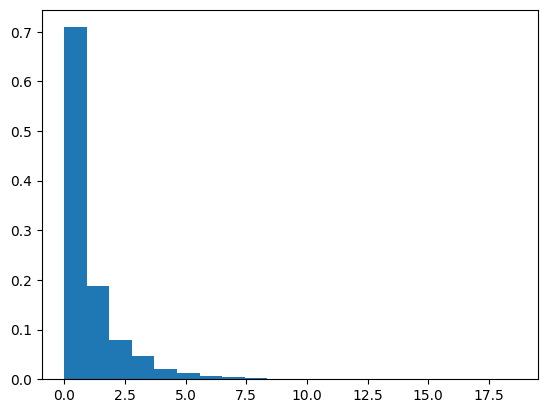

In [39]:
#Histogram of sampling distribution of -2*log of likelihood ratio test statistic (at null hypothesis)
plt.hist(-2*lrt,bins = 20,density=True)
plt.show()

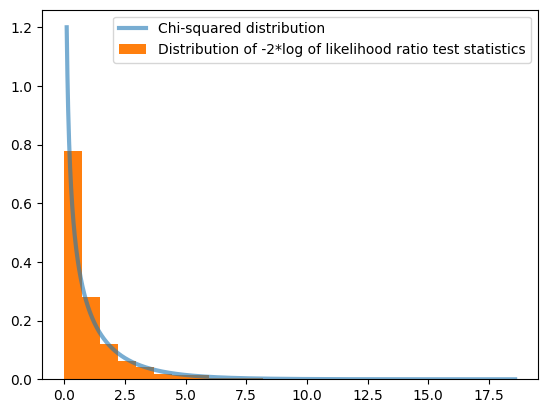

In [42]:
#Compare with chi-squared distribution. Does Wilks' Theorem hold here?
z = np.arange(0.1,max(-2*lrt),0.01)
fig, ax = plt.subplots(1, 1)
ax.plot(z,chi2.pdf(z, df=1),lw=3, alpha=0.6, label='Chi-squared distribution')
ax.hist(-2*lrt, bins = 25,density=True,label='Distribution of -2*log of likelihood ratio test statistics')
ax.legend(loc='upper right')
plt.show()

# Power function

$\beta(p) = P(\lambda(\vec{X}) \leq c |p)$

For a size $\alpha = 0.05$ likelihood ratio test, the asymptotic critical value is 0.1465.

In [43]:
def likelihood_ratio(x,p0):
    #x is the simulated dataset across many experiments
    #p0 is the null hypothesis
    sample_sum = np.sum(x,axis=0) #summing across observations within an experiment
    sample_mean = np.mean(x,axis=0) #mean across observations within an experiment
    lrt = np.log(p0)*sample_sum  + np.log(1-p0)*(n-sample_sum) - np.log(sample_mean)*sample_sum  - np.log(1-sample_mean)*(n-sample_sum)
    return lrt

In [50]:
power = []
for p in np.linspace(0.1,0.9,100):
  x = np.random.binomial(1,p,(n,s))
  lrt = likelihood_ratio(x,p0)
  #probability of rejecting the null at different values of p in the data-generating process
  power.append([np.mean(np.exp(lrt)<0.1465)])

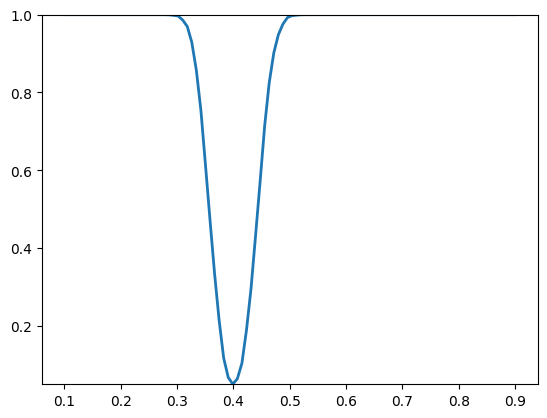

In [51]:
#Plotting the Power function
plt.plot(np.linspace(0.1,0.9,100),power,lw=2)
plt.ylim((0.05,1.0))
plt.show()

Now compare the power function using different values of n, as well as different rejection regions.

In [46]:
power2 = []
n=500
for p in np.linspace(0.1,0.9,100):
  x = np.random.binomial(1,p,(n,s))
  lrt = likelihood_ratio(x,p0)
  #probability of rejecting the null at different values of p in the data-generating process
  power2.append([np.mean(np.exp(lrt)<0.1465)])

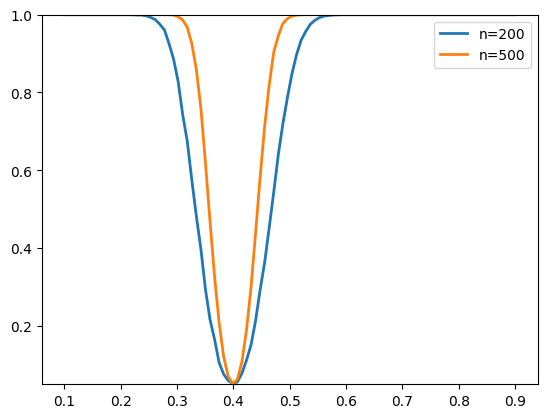

In [47]:
#Plotting the Power function
plt.plot(np.linspace(0.1,0.9,100),power,lw=2,label='n=200')
plt.plot(np.linspace(0.1,0.9,100),power2,lw=2,label='n=500')
plt.legend()
plt.ylim((0.05,1.0))
plt.show()

##  Find the exact size-0.05 test

In [52]:
#Data-generating process under the null hypothesis
p0 = 0.4 #null hypothesis
n = 200 #sample size
s = 10000 #number of simulations
x = np.random.binomial(1,p0,(n,s))

In [53]:
lrt = likelihood_ratio(x,p0)

Find $c$ such that $P(\lambda(\vec{X}) < c|p=p_{0}) = 0.05$. Let $F(c)$ be the cdf of $\lambda(\vec{X})$, then $c = F^{-1}(0.05)$. That is, we can obtain the rejection region as the 5-th percentile of the empirical distribution of $\lambda(\vec{X})$.

In [54]:
np.percentile(np.exp(lrt),5)

0.1340389144272082

The exact critical value is close to the asymptotic critical value for large $n$.